# Human resources in science and technologies
 
 partial reproduction of the [Statistics Explained](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Human_resources_in_science_and_technology&oldid=395960) article

In [1]:
datum<-Sys.Date()

Last modification: {{datum}}

In [2]:
# CONFIGURATION VALUES

year<-2020
age_group1<-'25 to 64' 
age_group2<-'15 to 74'
top<-3
threshold<-2/3

In [3]:
# CALCULATION
library(restatapi)
library(data.table)
library(ggplot2)
eu_cc<-get("cc",envir=.restatapi_env)$EU27_2020
efta_cc<-c("CH","NO","IS","LI")
#get_eurostat_dsd("hrst_st_nocc")
value0<-get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("HRSTO$","EU27_2020","THS","TOTAL",gsub(" to ","-",age_group1)),exact_match=F)$values
value1<-get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("HRSTO$","EU27_2020","THS","TOTAL",gsub(" to ","-",age_group2)),exact_match=F)$values
value2<-(get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("HRSTO$","EU27_2020","THS","TOTAL",gsub(" to ","-",age_group2)),exact_match=F)$values/get_eurostat_data("hrst_st_nocc",date_filter=(year-1),filters=c("HRSTO$","EU27_2020","THS","TOTAL",gsub(" to ","-",age_group2)),exact_match=F)$values-1)*100
value2_text<-if (value2>0) {'increase'} else {'decrease'}
value3<-(get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("HRSTO$","EU27_2020","THS","TOTAL",gsub(" to ","-",age_group1)),exact_match=F)$values/get_eurostat_data("hrst_st_nocc",date_filter=(year-1),filters=c("HRSTO$","EU27_2020","THS","TOTAL",gsub(" to ","-",age_group1)),exact_match=F)$values-1)*100
value3_text<-if (value3>0) {'increase'} else {'decrease'}
value4<-get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("HRSTO$","EU27_2020","^prof","^perc",gsub(" to ","-",age_group1)),exact_match=F,ignore.case=T)$values
value4_sub1<-get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("EU27_2020","THS","TOTAL","^Scien",gsub(" to ","-",age_group1)),exact_match=F)$values/value0*100
value4_sub2<-(get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("HRSTO$","EU27_2020","THS","OC2",gsub(" to ","-",age_group1)),exact_match=F)$values-get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("EU27_2020","THS","TOTAL","^Scien",gsub(" to ","-",age_group1)),exact_match=F)$values)/value0*100
value5<-get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("HRSTO$","EU27_2020","^tech","^perc",gsub(" to ","-",age_group1)),exact_match=F,ignore.case=T)$values
value6<-setorder(get_eurostat_data("hrst_st_nocc",date_filter=year,filters=list(geo=eu_cc,isco08="oc2",category="hrsto",unit="pc",age=gsub(" to ","-",age_group1)),exact_match=F,name=F,ignore.case=T,label=T,verbose=F,stringsAsFactors=F),-values)[]
value6$geo<-gsub(" \\(.*\\)","",value6$geo)
value6_text<-gsub("(.*),","\\1 and",lapply(value6[1:top,.(txt=paste0(geo," (",format(values,1)," %)"))],paste,collapse=", "),perl=T)
value7<-value6[values>threshold*100 & seq_len(.N)>3]
value7_text<-gsub("(.*),","\\1 and",lapply(value7[,.(txt=paste0(geo," (",format(values,1)," %)"))],paste,collapse=", "),perl=T)



restatapi: - config file with the API version 1 loaded from GitHub (the 'current' API version number is 1).
           - 4 from the 8 cores are used for parallel computing, can be changed with 'options(restatapi_cores=...)'
           - 'auto' method will be used for file download, can be changed with 'options(restatapi_dmethod=...)'
           - the Table of contents (TOC) was not pre-loaded into the deafult cache ('.restatapi_env').



### markdown version

**Tweet:** 
In {{year}}, over ~~67~~ {{round(value0/1000)}} million people aged from {{message(age_group1)}} were employed in science and technology (HRSTO) in the EU. 

This article provides information on statistics [on human resources in science and technology (HRST)](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Human_resources_in_science_and_technology_(HRST)) which help us to better understand the demand for and the supply of people with strong qualifications in science and technology. It describes the current stock of HRST in the [European Union](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_Union_(EU)), the [EFTA](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_Free_Trade_Association_(EFTA)) countries and the [candidate countries](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Candidate_countries) and gives information on the current and future supply of highly skilled people from universities and other specialised education institutions in the HRST field.

Investment in research, development, education and skills is a key policy area for the EU as it is essential for economic growth and for the development of a [knowledge-based economy](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Knowledge-based_economy). There is, therefore, a great need to measure and analyse the most highly skilled part of the [labour force](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Labour_force), both within the EU and internationally. 

### Professionals and technicians employed in science and technology occupations

In {{year}}, ~~72.9~~ {{round(value1/1000,1)}} million people in the EU aged from {{message(age_group2)}} were employed in science and technology (and therefore considered as human resources in science and technology by occupation — HRSTO (see Figure 5 below)), an {{ message(value2_text) }} of ~~1.7~~ {{abs(round(value2,1))}} % compared with {{year-1}}.

Within this ~~72.9~~ {{round(value1/1000,1)}} million, ~~67.7~~ {{round(value0/1000,1)}} million people were in the {{message(age_group1)}} age group, an {{ message(value3_text) }} of ~~1.9~~ {{abs(round(value3,1))}} % compared with {{year-1}}. From this broad group ~~57.0~~ {{value4}} % were ['professionals'](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Professionals_group) (~~22.6%~~ {{round(value4_sub1,1)}} of ‘Scientists and Engineers’ and ~~34.4%~~ {{round(value4_sub2,1)}} of ‘Other professionals (other than SE)’) and ~~43.0~~ {{value5}} % were [‘technicians’](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Technicians_and_associate_professionals_group). However, the percentage differed greatly between Member States. ~~Luxembourg (72.3 %), Lithuania (72.1 %) and Romania (70.8 %)~~ {{message(value6_text)}} reported the highest proportion of professionals. Other Member States with more than two thirds professionals were ~~Greece (70.2 %), Ireland (69.0 %) and Portugal (67.0 %)~~  {{message(value7_text)}} (see Figure 1). 

In [4]:
# PREPARE DATA FOR THE PLOT
dt_sep<-data.table::data.table(geo=c(" ","  ","   "),group=rep("Scientists and Engineers",3),values=rep(NA,3),pct=rep(NA,3),name=c(" ","  ","   "))
dt_fig1<-get_eurostat_data("hrst_st_nocc",date_filter=year,filters=c("THS","HRSTO","^Scient","OC",gsub(" to ","-",age_group1)),exact_match=F,label=F)[geo!="EA19",c("category","isco08","geo","values")]
dt_fig1<-dt_fig1[grepl("^SE",category),isco08:=category]
dt_fig1<-dcast(dt_fig1,geo ~ isco08,value.var="values")[,OC2_SE:=OC2-SE]
setnames(dt_fig1,c("geo","Professionals","Technicians and associate professionals","Scientists and Engineers","Other professionals (other than SE)"))
dt_fig1<-melt(dt_fig1[,c(1,3:5)],id.vars="geo")[]
setnames(dt_fig1,c("geo","group","values"))
dt_fig1[,pct:=values/sum(values)*100,by=geo]
dsd<-as.data.table(get_eurostat_dsd("hrst_st_nocc"))[concept=="GEO",c("code","name")]
dt_fig1<-merge(dt_fig1,dsd,by.x="geo",by.y="code",all.x=T)
dt_fig1$name<-gsub(" \\(.*\\)","",dt_fig1$name)
dt_fig1$name<-gsub("^Eu.*","EU",dt_fig1$name)
name_ord<-dt_fig1[(geo %in% eu_cc)&grepl("^Scien",group)]
name_ord_eu<-name_ord[order(pct)]$name
name_ord<-dt_fig1[(geo %in% efta_cc)&grepl("^Scien",group)]
name_ord_efta<-name_ord[order(pct)]$name
name_ord<-dt_fig1[!(geo %in% c(efta_cc,eu_cc,"EU27_2020"))&grepl("^Scien",group)]
name_ord_othr<-name_ord[order(pct)]$name
name_ord<-c(name_ord_othr,' ',name_ord_efta,'  ',name_ord_eu,'   ','EU')
dt_fig1<-rbind(dt_fig1,dt_sep)
dt_fig1$name<-factor(dt_fig1$name,levels=name_ord)
gr_ord<-c("Technicians and associate professionals","Other professionals (other than SE)","Scientists and Engineers")
dt_fig1$group<-factor(dt_fig1$group,levels=gr_ord)


Warning message:
“Removed 3 rows containing missing values (position_stack).”


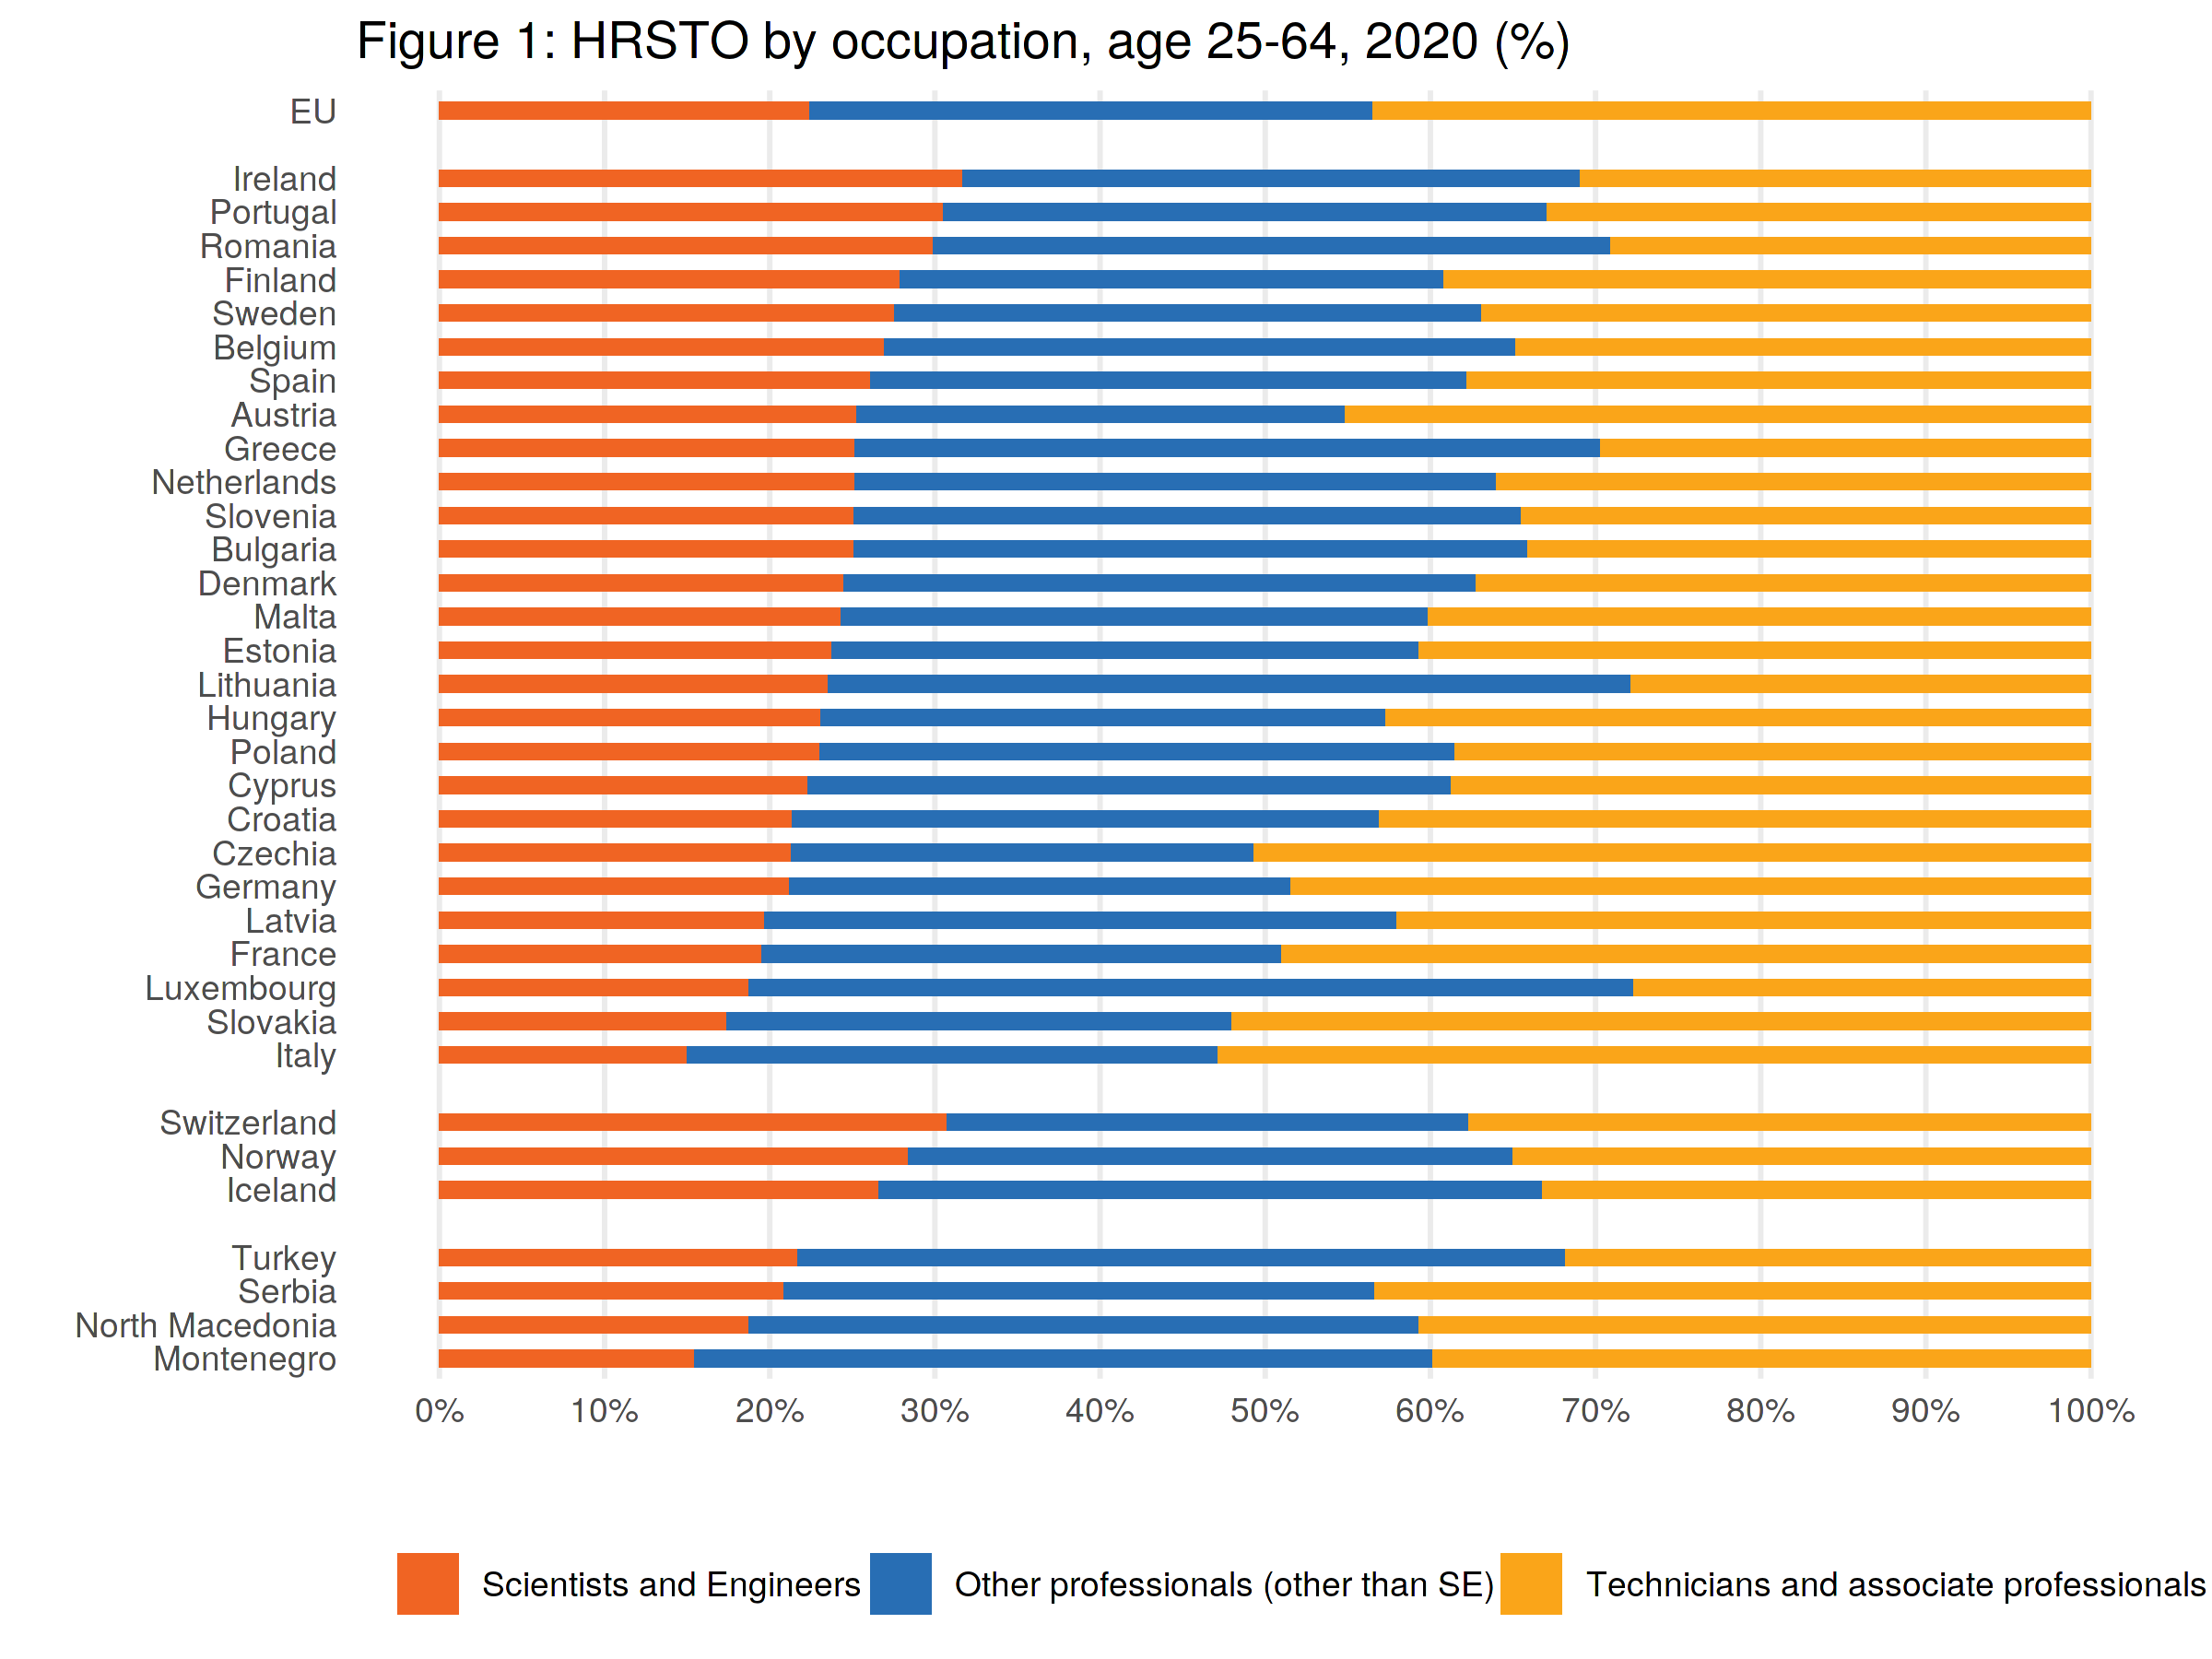

In [5]:
# PLOT THE DATA
options(repr.plot.width=8, repr.plot.height=6,repr.plot.res=300)
fig1_colors<-c("#FAA519","#286EB4","#F06423") #,"#F6A26B","#71A8DF",,"#FDDBA3","#FCC975"
ggplot(dt_fig1, aes(x=name,y=pct,fill=group)) + theme_minimal() +
  geom_bar(stat='identity',width=0.5)+
  scale_fill_manual(values = fig1_colors)+
  scale_y_continuous(limits=c(0,101),breaks=seq(0,100,10),label =  function(x) paste0(x, "%"))+
  ggtitle("Figure 1: HRSTO by occupation, age 25-64, 2020 (%)") +
  ylab("")+
  xlab("")+
  coord_flip()+
  theme(legend.title = element_blank(),
        legend.position= "bottom",
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_blank())+             
  guides(fill=guide_legend(reverse=T))